In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 70

xc = n/2
yc = n/2

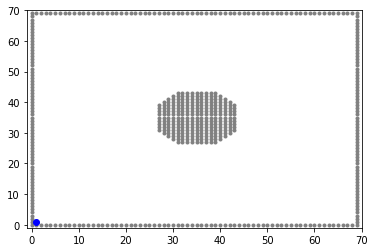

In [2]:
def is_absorbent(position): # test if position is an absorption site (set A union B)
    i, j = position
    return (i == 0 or j == 0 or i == n-1 or j == n-1 or is_good_exit(position)
            or np.linalg.norm([i-xc,j-yc]) <  9)

def is_good_exit(position): # test if position is a good absorption site (the set A)
    i, j = position
    return i==1 and j==1


class Point:   # a point in the grid
    def __init__(self, x, y, is_absorbent=False, is_good_exit=False):
        self.x = x
        self.y = y
        self.good_exit = is_good_exit
        self.absorbent = is_absorbent
        self.neighbors = []
        self.id = self.x*n + self.y # unique integer in 0.....n*n-1 that identifies the point uniquely
    
    def position(self):
        return (self.x, self.y)
    
    def is_absorbent(self):
        return self.good_exit or self.absorbent
    /
    def is_good_exit(self):
        return self.good_exit


all_states = [Point(i, j, is_absorbent=is_absorbent((i,j)), is_good_exit=is_good_exit((i,j)))
             for i in range(n)
             for j in range(n)]

for point in all_states:
    if not point.is_absorbent():
        for potential_neighbor in all_states:
            if (potential_neighbor.x - point.x)**2+(potential_neighbor.y - point.y)**2 <= 2:
                point.neighbors.append(potential_neighbor)



plt.xlim(-1,n)
plt.ylim(-1,n)
plt.scatter([point.x for point in all_states if point.is_absorbent()],
            [point.y for point in all_states if point.is_absorbent()],
            color='grey', marker='.'
           )
plt.scatter([point.x for point in all_states if point.is_good_exit()],
            [point.y for point in all_states if point.is_good_exit()],
            color='blue', marker='o'
           )
plt.show()

In [3]:
# check that the indices
assert sorted(range(n*n)) == sorted([point.id for point in all_states])


n_states = n*n

P = np.zeros( (n_states, n_states) )  # transition probabilities of the unconditional chain
for point in all_states:
    if point.is_absorbent():
        P[point.id, point.id] = 1.0 # absorbent state
    else:
        for neighbor in point.neighbors:
            P[point.id, neighbor.id] = 1.0/len(point.neighbors) # move to a neighbor, uniformly
            
for point in all_states:
    assert sum(P[point.id, :]) >= 0.99 and sum(P[point.id, :]) <= 1.01

In [4]:
a = np.zeros( (n_states, n_states ) ) # linear system, see the np.linalg.solve documentation
for point in all_states:
    if not point.is_absorbent():
        for neighbor in point.neighbors:
            a[point.id, neighbor.id] = - P[point.id, neighbor.id]
    a[point.id, point.id] = 1.0

b = np.zeros(n_states) # boundary conditions: 1 for good exists and 0 for others.
for point in all_states:
    if point.is_good_exit():
        b[point.id] = 1.0


h = np.linalg.solve(a, b) # solve the linear system


In [5]:
P_transformed = np.zeros_like(P)
for point in all_states:
    if not point.is_absorbent():
        for second_point in all_states:
            assert h[point.id] != 0.0
            P_transformed[point.id, second_point.id] = P[point.id, second_point.id] * h[second_point.id] / h[point.id]
    else: # absorption once it reaches an exit
        P_transformed[point.id, point.id] = 1.0


In [6]:

x0 = n-2
y0 = n-2

current = [point for point in all_states if point.x == x0 and point.y==y0][0] # starting point
points_visited = []

while(True):
    proba = [P_transformed[current.id, neighbor.id] for neighbor in current.neighbors]
    proba = proba/sum(proba)
    current = np.random.choice(
        current.neighbors,
        1, # return one random element
        p=proba)[0]
    points_visited.append(current)
    if current.is_good_exit():
        break
    
    

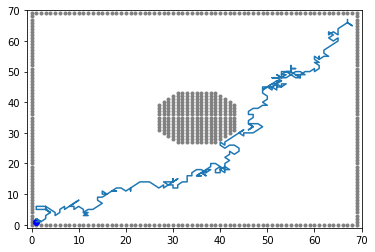

In [7]:


plt.plot([p.x for p in points_visited], [p.y for p in points_visited])
plt.xlim(-1,n)
plt.ylim(-1,n)
plt.scatter([point.x for point in all_states if point.is_absorbent()],
            [point.y for point in all_states if point.is_absorbent()],
            color='grey', marker='.'
           )
plt.scatter([point.x for point in all_states if point.is_good_exit()],
            [point.y for point in all_states if point.is_good_exit()],
            color='blue', marker='o'
           )
plt.show()




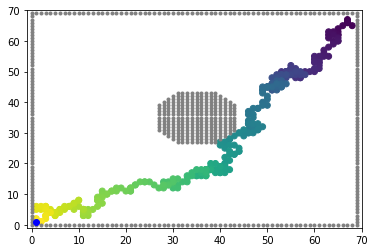

In [8]:

plt.scatter([p.x for p in points_visited], [p.y for p in points_visited],
            c=[i for i in range(len(points_visited))])
plt.xlim(-1,n)
plt.ylim(-1,n)
plt.scatter([point.x for point in all_states if point.is_absorbent()],
            [point.y for point in all_states if point.is_absorbent()],
            color='grey', marker='.'
           )
plt.scatter([point.x for point in all_states if point.is_good_exit()],
            [point.y for point in all_states if point.is_good_exit()],
            color='blue', marker='o'
           )

plt.show()